<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [Interpolation](05.09-Interpolation.ipynb) | [Contents](Index.ipynb) | [Uncertainty Intervals](05.11-Uncertainty-Intervals.ipynb) >

## 5.9 插值

做插值的方法有很多种。常用的方法是分段线性和非线性、样条函数和径向基函数。在这一部分，我们将使用分段线性和径向基函数对数据进行插值。

我们将首先生成几个具有指数关系的数据点。然后我们将使用`scipy.interpolate`库中的`interp1d`函数插值。这个函数返回一个对象，稍后可以使用该对象评估所需数据点处的拟合分段线性曲线。图5.15显示了拟合的分段多项式以及用于生成它的数据。

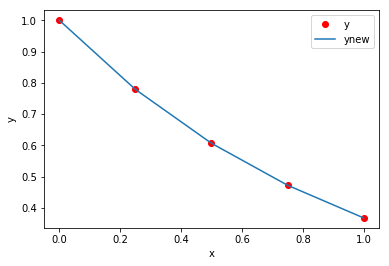

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
# generate data
x = np.linspace(0,1,5)
y = np.exp(-x)
f = interp1d(x,y)
xnew = np.linspace(x.min(),x.max())
ynew = f(xnew) #use interpolation function returned by `interp1d`
# plot
plt.plot(x,y,'ro',label='y')
plt.plot(xnew, ynew, '-',label='ynew')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<center>图5.15：插值曲线与测量数据</center>

`interp1d`不进行外推，如果我们想在输入数据范围外拟合数据，它将会产生一个错误。我们可以通过指定`bounds_error=None`参数抑制错误。在这个情况下，如果我们想在输入数据范围之外插值，它会给`nan`。实现输入数据范围之外的插值，我们可以使用`scipy.interpolate`库中的`Rbf`函数。记住在4.4节中，插值数据只在输入数据的位置范围之内。我们将使用`Rbf`函数实现输入数据范围之外的插值。我们使用`plt.imshow`来绘制二维图。如图5.16所示。从图中可以清晰地看出，它可以在输入数据范围之外插值。

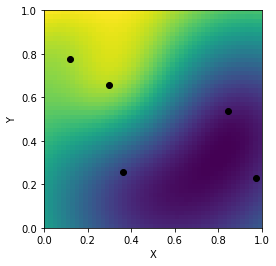

In [8]:
from scipy.interpolate import Rbf
x = np.random.rand(5)
y = np.random.rand(5)
pet = 2+2*np.random.rand(5)

rbfi = Rbf(x, y, pet) # radial basis function interpolation instance

xi = np.linspace(0,1)
yi = np.linspace(0,1)
XI, YI = np.meshgrid(xi,yi) # gridded locations

di = rbfi(XI, YI) # interpolated values

plt.imshow(di, extent=(0,1,0,1), origin='lower')
plt.scatter(x,y, color='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis((0,1,0,1))
plt.show()

<center>图5.16：二维插值</center>